# Exercise 2
Data is in https://drive.google.com/drive/folders/101uoeXxByvdccuiZXCZSuXYQHDjeZo5v?usp=sharing Any one with UMD Mail ID can access the data

This notebook is in https://colab.research.google.com/drive/1Xa6lahU9g_kIEaKKiQlB8VLbkk5JoWL8?usp=sharing Any one with UMD Mail ID can access the file

In [ ]:
!pip install sklearn

#1. Loading the data house_train.csv - the training set and house_test.csv - the test set

In [72]:
from google.colab import drive
drive.mount('/content/drive')
PATH = '/content/drive/MyDrive/ENPM808W/HW2_data/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import all the libraries needed for the prediction and read the traning and testing data from the csv file to pandas dataframe

In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

#read the csv file
house_train = pd.read_csv(PATH + 'house_train.csv')
house_test = pd.read_csv(PATH + 'house_test.csv')


look for null values and plot a correlation heatmap to find the correlation  columns 
price2013 and price2007 are highly correlated

In [ ]:
house_train.isnull().sum() #found no null values

id           0
zip          0
state        0
county       0
poverty      0
price2007    0
price2013    0
dtype: int64

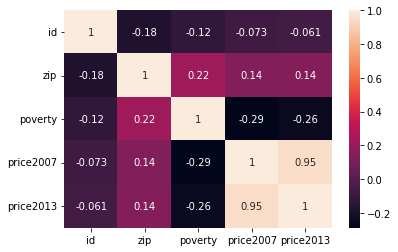

In [123]:
correlation_matrix=house_train.corr()
sns.heatmap(data=correlation_matrix,annot=True)

Plot a scatter plot for State vs Price2007 and then with Price2013. Average house prices for 2007 and 2013 are the highest in CA

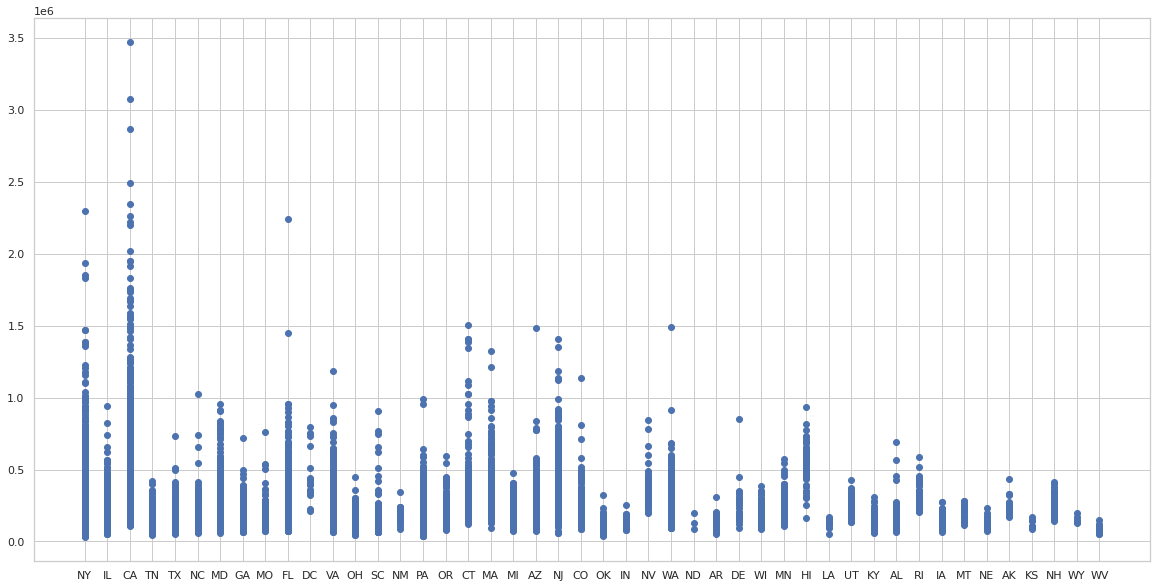

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter('state','price2007',data=house_train)
plt.show()

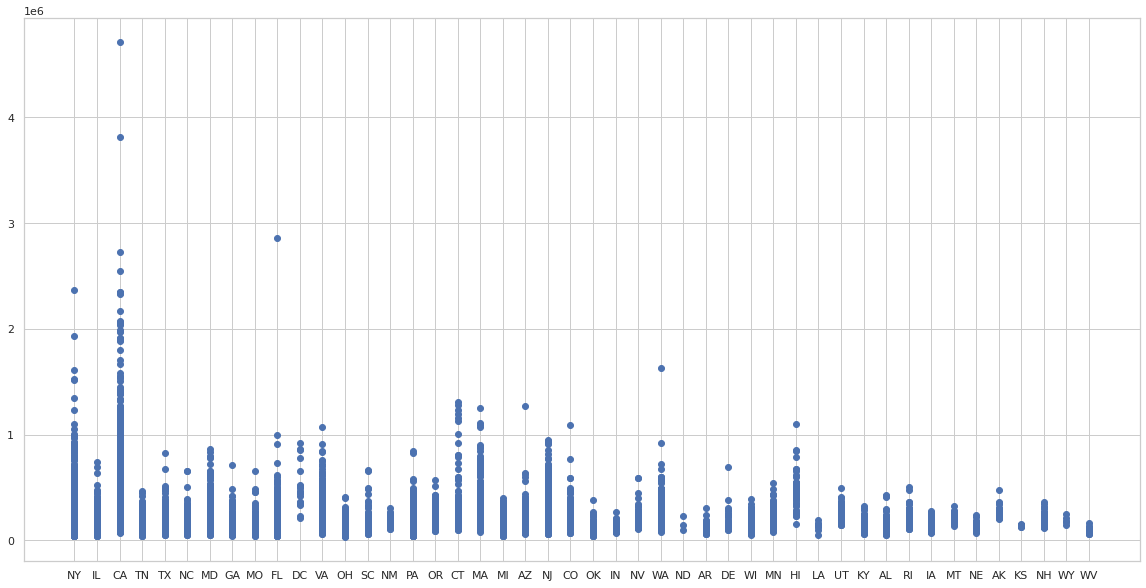

In [ ]:
plt.figure(figsize=(20,10))
plt.scatter('state','price2013',data=house_train)
plt.show()

#2. (40 points) Predict 2013 home prices using state information only.

Before taking state column for linear regression, we need to alter the state data as it is a categorical data column. I did so using ‘pandas.get_dummies’ method to get the dummy values. This will be the independent variable x. Our y variable is going to be price2013

In [89]:
x=pd.get_dummies(house_train['state'],drop_first=True)        # get dummies for categorical data - states
y=house_train['price2013']                  
print(x)

      AL  AR  AZ  CA  CO  CT  DC  DE  FL  GA  ...  RI  SC  TN  TX  UT  VA  WA  \
0      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
2      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
3      0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4      0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
8968   0   0   0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   
8969   0   0   0   1   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
8970   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   1   0   0   
8971   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
8972   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

      WI  WV  WY  
0      0

In [90]:
model1 = LinearRegression()
reg1a = model1.fit(x,y)
intercept = reg1a.intercept_
coef = reg1a.coef_
print("\n Intercept:", intercept)                  
print("\n Correlation Coefficient: \n", coef)  
print("\n Score:",reg1a.score(x,y))


 Intercept: 281729.99999999965

 Correlation Coefficient: 
 [-1.40892637e+05 -1.59320411e+05 -7.47779798e+04  2.30872896e+05
 -3.31445455e+04  6.70160377e+03  2.32558889e+05 -7.44633333e+04
 -1.06742121e+05 -1.39333721e+05  1.98581364e+05 -1.28573210e+05
 -1.06567771e+05 -1.46506471e+05 -1.43630000e+05 -1.35713333e+05
 -1.44257273e+05  5.77500000e+04  1.15519713e+02 -1.38182030e+05
 -7.54763277e+04 -1.27859197e+05 -5.57347619e+04 -1.32108019e+05
 -1.24863333e+05 -1.42711481e+05 -7.92850562e+04  2.47604645e+04
 -9.23758333e+04 -6.66660656e+04  1.70166176e+04 -1.64368283e+05
 -1.71825238e+05 -6.68951685e+04 -1.13104332e+05 -5.86692157e+04
 -1.35617786e+05 -1.50723089e+05 -1.21074828e+05 -4.37300000e+04
  1.83131280e+04 -1.52661217e+04 -1.18829479e+05 -1.83306923e+05
 -8.72500000e+04]

 Score: 0.28677815383945593


In [6]:
max(coef)

232558.88888888978

In [7]:
min(coef)

-183306.92307692266

Above, we got a list of coefficients associated with each state with minimum and maximum coeffs. But I could not trace it back to the state from that format. Hence, below we are using statsmodel -> OLS to find least and most expensive average homes. You can see that intercept is same using both models.

In [8]:
from statsmodels.formula.api import ols

#Create a Model from a formula and dataframe.
#OLS measures the accuracy of a linear regression model.
#Assumption: A linear relationship exists between the dependent and predictor variables. 
reg1b = ols("price2013 ~ state", data=house_train).fit()
print('Intercept: ',reg1b.params.Intercept)
reg1b_state_params = reg1b.params.drop(labels=['Intercept'])
print('Least Expensive Homes is in ', reg1b_state_params.idxmin(), ' with coef: ',reg1b_state_params.min())
print('Most Expensive Homes is in ', reg1b_state_params.idxmax(), ' with coef: ',reg1b_state_params.max())

#house_train.describe()


Intercept:  281730.0000000005
Least Expensive Homes is in  state[T.WV]  with coef:  -183306.92307692376
Most Expensive Homes is in  state[T.DC]  with coef:  232558.88888888923


**Answer these questions using all of the training data available.**

a. What is the intercept? What does it correspond to?
The intercept is the predicted value of Y when all independent variables (Xs) are set to 0. In other words, it is the value of Y when there is no independent variable present.
The Intercept 281730.0000000005 here represents the estimated mean price 2013 given that state information is not available or in binary sense, 0.

b. How do you get this information from your regression?

I got this information about intercept from my linear regression model 'reg' made by making outcome/dependent variable as price2013 and independent/ variable used to predict price2013 as state information.

c. Based on your regression coefficients, what states have the most and least
expensive average homes?

According to the coeffecients of reg (reg.params) I found that the Least Expensive avergae homes are in state of WV (West Virginia) while the Most Expensive average homes are in state of DC (District of Columbia).

d. How do you get this information from your regression?

I got this information by finding the minimum and maximum from reg.params (after extracting the intercept coefficient) which lists the coefficients for each state individually along with State Intitials. The states with the most expensive average homes have higher values for the intercept and all of the independent variables than the states with the least expensive average homes. This means that, on average, homes in these states are more expensive than homes in the states with the least expensive average homes.

e. What is the average price of homes in those states?

Avergage price of homes in WV => 281730 - 183306.9 = $98423.1

Average price of homes in DC => 281730 + 232558.9 = $514288.9

f. How do you get this information from your regression?

I got this information from the intercept of the overall linear model (reg.params.Intercept) and regression coefficients of the states (DC, WV) individually.

#3. Predict 2013 home prices from state and county information.


In [115]:
#x2 = pd.get_dummies(data=house_train, columns=['state', 'county'], drop_first=True)
x2=pd.get_dummies(house_train[['state', 'county']],drop_first=True)  # get dummies for categorical data - state and county
y=house_train['price2013'] 
model2 = LinearRegression()
reg2a = model2.fit(x2,y)

In [95]:
#to find highest and lowest regression coefficients, we use OLS model
reg2b = ols("price2013 ~ state + county", data =house_train).fit()
reg2b_stateCounty_params = reg2b.params.drop(labels=['Intercept'])
print('Least Expensive Homes is in ', reg2b_stateCounty_params.idxmin(), ' with coef: ',reg2b_stateCounty_params.min())
print('Most Expensive Homes is in ', reg2b_stateCounty_params.idxmax(), ' with coef: ',reg2b_stateCounty_params.max())



intercept:  149221.03133260462
Least Expensive Homes is in  county[T.calaveras]  with coef:  -352624.38466591935
Most Expensive Homes is in  county[T.pitkin]  with coef:  857920.2646194387


a. What US counties have the highest and lowest regression coefficients? Why?

County Pitkin has highest and Calaveras has lowest regression coefficients

The counties with the highest regression coefficients are those with already high housing prices, whereas the counties with the lowest regression coefficients are those with already low housing prices. This is due to the fact that housing prices are a result of supply and demand, and there is less potential for them to rise in places where they are already high than there is in areas where they are already low

#4. Challenge: Build a regressor that best predicts average home values in this dataset.

In [ ]:
train = house_train.copy()
train.state = pd.Categorical(train.state)
train['state_num'] = train.state.cat.codes
train.county = pd.Categorical(train.county)
train['county_num'] = train.county.cat.codes
train.head()


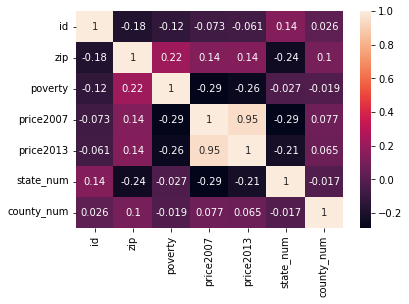

In [300]:
 
correlation_matrix=train.corr()
sns.heatmap(data=correlation_matrix,annot=True)

Negative correlation indicates downward slope meaning as x increases/decreases, y decreases/increases and positive correlation indicates upward slope meaning as x increases/decreases, y increases/decreases

As you can see from the above heatmap,
zip has positive correlation with price2013 : 0.14

poverty has negative correlation with price2013 : -0.26

price2007 has positive correlation with price2013 : 0.95

state has negative correlation with price2013 : -0.21 

county has positive correlation with price2013 : 0.065

In [ ]:
house_test.head()
#house_test['state'].unique()

In [ ]:
print(house_test.isnull().sum())

In [310]:
#training data prep
train1 = house_train.copy()
#dummies_state = pd.get_dummies(train1['state']) 
dummies_county = pd.get_dummies(train1['county']) 
# Concatenate the dummies to original dataframe 
merged_train = pd.concat([train1, dummies_county], axis=1) 
# drop the values 
merged_train.drop(['id', 'state', 'county', 'price2013'], axis=1, inplace=True)
merged_train.head()

,zip,poverty,price2007,adams,aiken,alachua,alamance,alameda,albany,albemarle,...,yadkin,yakima,yamhill,yates,yavapai,yellowstone,yolo,york,yuba,yuma
0,10467,27.1,335200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11226,21.9,471500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60640,14.6,254600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,94109,10.6,707100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11375,12.2,636400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [311]:
#testing data prep
test = house_test.copy()
def missing_cols1(col):
  x = pd.get_dummies(test[col],drop_first=True) 
  missing_state = set(house_train[col]) - set(test[col])
  for m in missing_state:
    x[m] = 0
  return x
#dummies_state = missing_cols1('state') 
dummies_county = missing_cols1('county')
dummies_county = dummies_county.reindex(sorted(dummies_county.columns), axis=1)
# Concatenate the dummies to original dataframe 
merged_test = pd.concat([test, dummies_county], axis=1) 
# drop the values 
merged_test.drop(['id', 'state', 'county'], axis=1, inplace=True)
merged_test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


,zip,poverty,price2007,aiken,alachua,alamance,alameda,albany,albemarle,alexandria city,...,yadkin,yakima,yamhill,yates,yavapai,yellowstone,yolo,york,yuba,yuma
0,32162,13.0,265600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78572,34.0,79900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11212,21.9,332000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37042,12.7,98700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85032,12.9,266100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


training and testing data have uneven state and column rows when transformed using get dummies function. So we need to drop some values from both dataframes to make it even

In [312]:
merged_train.drop(merged_train.columns.difference(merged_test.columns).tolist(), axis=1, inplace=True)
merged_train.head()

,zip,poverty,price2007,aiken,alachua,alamance,alameda,albany,albemarle,alexandria city,...,yadkin,yakima,yamhill,yates,yavapai,yellowstone,yolo,york,yuba,yuma
0,10467,27.1,335200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11226,21.9,471500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,60640,14.6,254600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,94109,10.6,707100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11375,12.2,636400,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [313]:
merged_test.drop(merged_test.columns.difference(merged_train.columns).tolist(), axis=1, inplace=True)
merged_test.head()

,zip,poverty,price2007,aiken,alachua,alamance,alameda,albany,albemarle,alexandria city,...,yadkin,yakima,yamhill,yates,yavapai,yellowstone,yolo,york,yuba,yuma
0,32162,13.0,265600,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,78572,34.0,79900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11212,21.9,332000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,37042,12.7,98700,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,85032,12.9,266100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#training the model
x_train = merged_train
y_train = train1['price2013']
model_train = LinearRegression()
reg_train = model_train.fit(x_train,y_train)
intercept = reg_train.intercept_
coef = reg_train.coef_
print("\n Intercept:", intercept)                  
print("\n Score:",reg_train.score(x_train,y_train))

In [307]:
#testing the model
x_test = merged_test
test_pred = reg_train.predict(x_test)

f = open(PATH+'submission4_dradhakr.csv', 'w')
pred = pd.DataFrame(test_pred)
new_df = pd.concat([house_test['id'], pred], axis=1)
new_df.columns = ['id', 'prediction']


In [ ]:
new_df

In [309]:
new_df.to_csv(PATH+'submission4_dradhakr.csv', index=False)

**4a.  Describe what you did to build the best predictor possible **

According to the heatmap, the best correlation for price2013 was with variable price2007 variables (0.95) along with other variables like zip and county giving positive correlations. state had a negative correlation with price2013, so I trained the model without the state.

**4b.  Give your best Kaggle score** 

48683.47090

**4c.  Give your Kaggle username **

disharadhakrishna (Disha Radhakrishna)
Apparently username cannot be modified by users. I shot a mail to the customer service guys to change it to dradhakr_did. So please check for that incase you dont find disharadhakrishna. Thanks

#5. Suppose you have 2 bags. Bag #1 has 1 black ball and 2 white balls. Bag #2 has 1 black ball and 3 white balls. Suppose you pick a bag at random, and select a ball from that bag.  What is the probability of selecting a white ball? 




Answer:
W = White
B1 - Bag 1
B2 = Bag 2

You have a  50% or 1/2  probability of choosing a bag out of 2.
Considering independence between choosing a bag and selecting a white ball,
𝑃(W^B1) = 2/3 * 1/2 = 1/3

𝑃(W^B2) = 3/4 * 1/2 = 3/8

By Law of total probability, P(W) is the sum of these:

P(W) = P(W^B1) + P(W^B2) = 1/3 + 3/8 = 17/24 = 0.7083 or 70.83%

#6. A soccer team wins 60% of its games when it scores the first goal, and 10% of its games when the opposing team scores first. If the team scores the first goal about 30% of the time, what fraction of the games does it win? 



Answer: 
SF = Score First; OSF = Opposite Score First; W = win

Given that

P(W/SF) = 60% = 60/100

P(W/OSF) = 10% = 10/100

P(SF) = 30% = 30/100

P(OSF) = 100% - 30% = 70% = 70/100

Find P(W)

By Law of Total Probability
P(W)=P(W/SF)*P(SF) + P(W/OSF)*P(OSF)

=(60/100 * 30/100) + (10/100 * 70/100)

=18/100 + 7/100

=25/100 or 25%

P(W)=25/100